In [16]:
# Simon Lee 
# AM 170A

from array import array
from random import gauss
from tkinter import N
from turtle import color
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft, ifft
from scipy import stats
import seaborn as sns
import matplotlib.ticker as ticker

In [17]:
def cos_func(times, amplitude, frequency):
    return amplitude * np.cos(frequency * times)

def Gauss(x, A, B):
    return A*np.exp(-1*B*x**2)

In [18]:
def file_read(filename, splitnum1):
    f = open(filename, "r")                                                     
    lines = f.readlines()    
    dates = []
    cases = []                                                                                                                                                                  
    for line in lines:                                                                                  
        line = line.strip()                                                                             
        dates.append(line.split())
        cases.append(int(line.split()[splitnum1]))
    return cases

In [19]:
# read in file contents for northern hemisphere
canada_cases = file_read('../covidcase/north/canada.txt', 4)
india_cases = file_read('../covidcase/north/india.txt', 1)
russia_cases = file_read('../covidcase/north/russia.txt', 4)                                                                                                                                                                  
uk_cases = file_read('../covidcase/north/uk.txt',1)
usa_cases = file_read('../covidcase/north/usa.txt',4)
print(len(canada_cases))
    

705


In [20]:
# read in file contents for southern hemisphere
# Southern Hemisphere countries
argentina_cases = file_read('../covidcase/south/argentina.txt',4)                                                                                                                                                                 
brazil_cases = file_read('../covidcase/south/brazil.txt',4)
indonesia_cases = file_read('../covidcase/south/indonesia.txt',4)
singapore_cases = file_read('../covidcase/south/singapore.txt',4)
southafrica_cases = file_read('../covidcase/south/southafrica.txt',5)

In [21]:
def weekly_cases(cases):
    sum = 0
    cases_weekly = []
    for i in range(len(cases)):
        sum += cases[i]
        if (i+1) % 7 == 0:
            cases_weekly.append(sum)
            sum = 0
    return cases_weekly


In [22]:
canada_week_cases = weekly_cases(canada_cases)
india_week_cases = weekly_cases(india_cases)
russia_week_cases = weekly_cases(russia_cases)
uk_week_cases = weekly_cases(uk_cases)
usa_week_cases = weekly_cases(usa_cases)

argentina_week_cases = weekly_cases(argentina_cases)
brazil_week_cases = weekly_cases(brazil_cases)
indonesia_week_cases = weekly_cases(indonesia_cases)
singapore_week_cases = weekly_cases(singapore_cases)
southafrica_week_cases = weekly_cases(southafrica_cases)
print(len(canada_week_cases))
print(len(india_week_cases))

100
100


In [23]:
import pandas as pd
array2 = np.linspace(1,100,100)
df = pd.DataFrame(list(zip(array2, canada_week_cases, india_week_cases, russia_week_cases, uk_week_cases, usa_week_cases, argentina_cases,brazil_week_cases, indonesia_week_cases, singapore_week_cases, southafrica_week_cases)),
               columns =['week','canada', 'india', 'russia', 'uk', 'usa', 'argentina', 'brazil', 'indonesia', 'singapore', 'south_africa'])


df.head(10)

,week,canada,india,russia,uk,usa,argentina,brazil,indonesia,singapore,south_africa
0,1.0,39,43,20,320,1040,1,38,34,178,13
1,2.0,147,100,127,10195,8022,1,334,193,135,103
2,3.0,431,486,511,25873,59672,6,2182,563,318,593
3,4.0,396,1402,2119,34238,154701,4,4282,887,369,671
4,5.0,278,3856,5895,37034,218298,0,9334,1279,623,465
5,6.0,226,6456,15818,27531,206296,5,12150,2180,2076,661
6,7.0,278,9002,33509,21931,201003,2,17437,2282,6442,1129
7,8.0,292,11692,41400,15330,197199,0,33928,2353,5500,1715
8,9.0,168,19942,66530,10213,187816,12,46926,2667,4557,2458
9,10.0,121,25049,76342,7281,160367,3,63526,3000,5148,4266


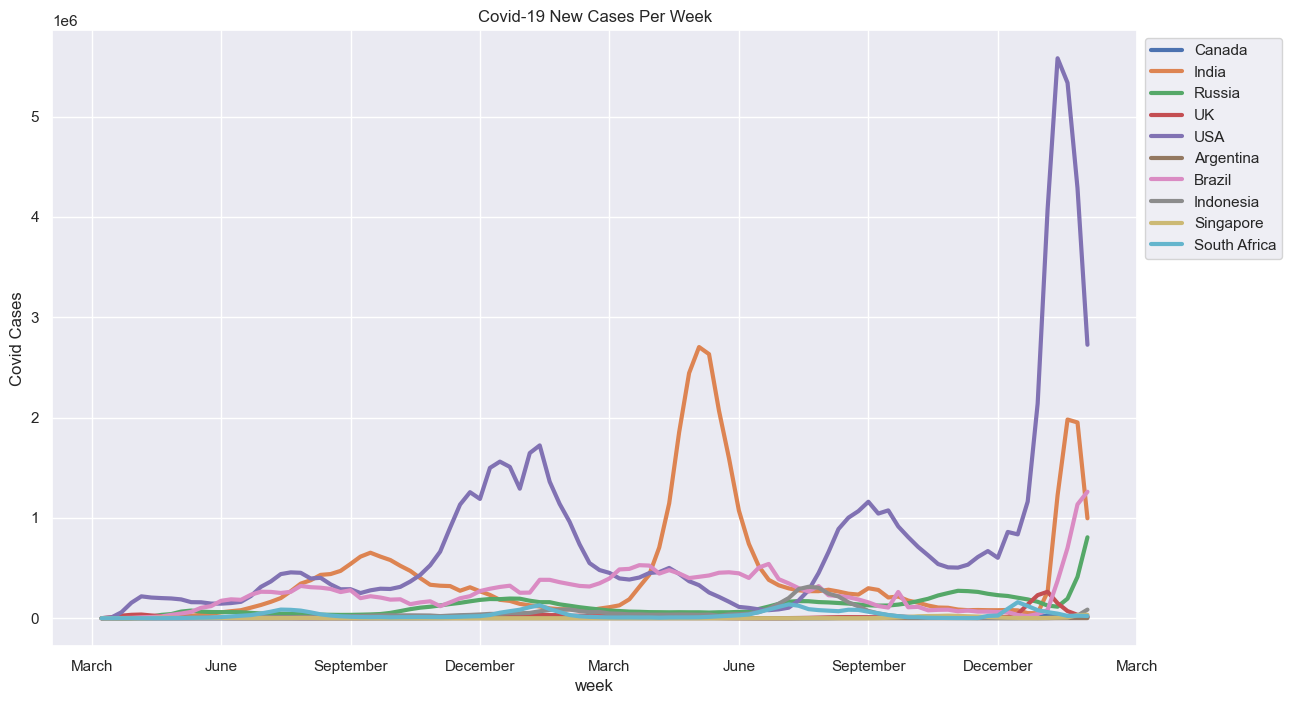

In [24]:

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df, x ='week', y = 'canada',
                label='Canada', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'india',
                label='India', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'russia',
                label='Russia', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'uk',
                label='UK', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'usa',
                label='USA', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'argentina',
                label='Argentina', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'brazil',
                label='Brazil', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'indonesia',
                label='Indonesia', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'singapore',
                label='Singapore', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'south_africa',
                label='South Africa', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Covid Cases')
plt.xticks([0,13,26,39,52,65,78,91,105], ['March', 'June','September', 'December','March', 'June','September', 'December', 'March'])
plt.title('Covid-19 New Cases Per Week')
plt.savefig('cases.png')
plt.show()

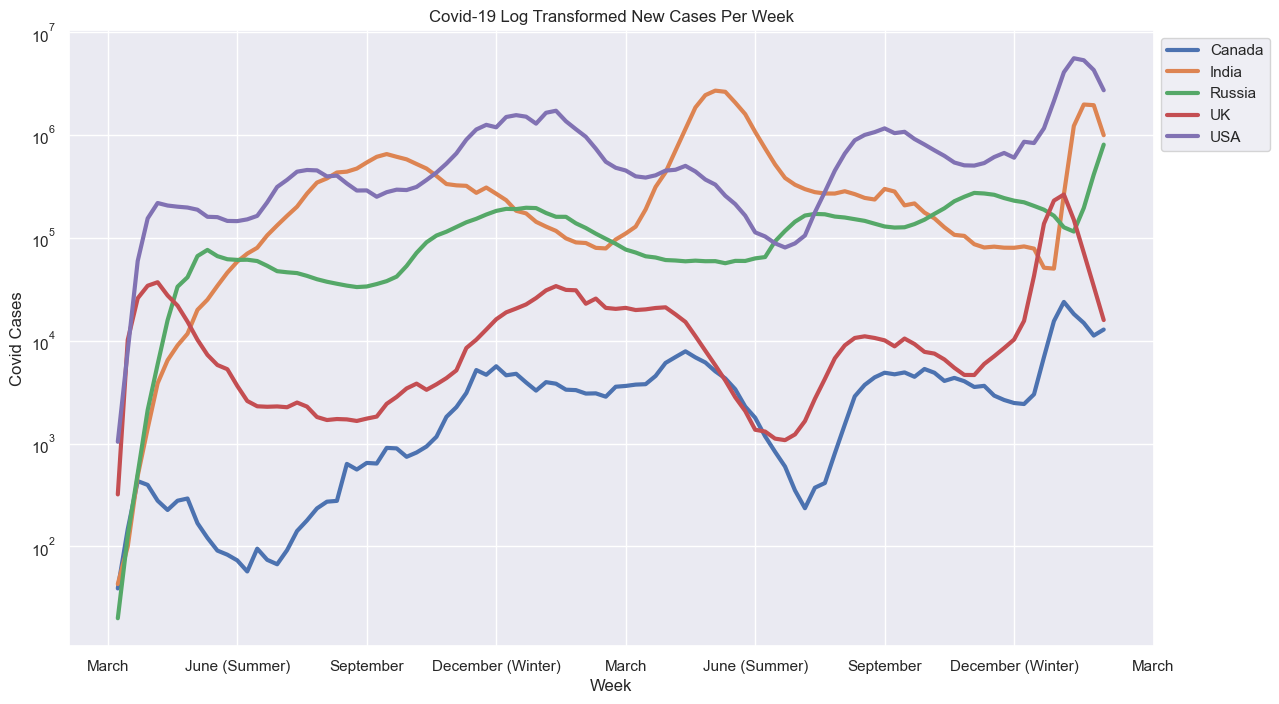

In [25]:

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df, x ='week', y = 'canada',
                label='Canada', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'india',
                label='India', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'russia',
                label='Russia', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'uk',
                label='UK', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'usa',
                label='USA', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.yscale("log") 
plt.ylabel('Covid Cases')
plt.xlabel('Week')
plt.title('Covid-19 Log Transformed New Cases Per Week')
plt.xticks([0,13,26,39,52,65,78,91, 105], ['March', 'June (Summer)','September', 'December (Winter)','March', 'June (Summer)','September', 'December (Winter)', 'March'])
plt.savefig('cases_log1.png')
plt.show()

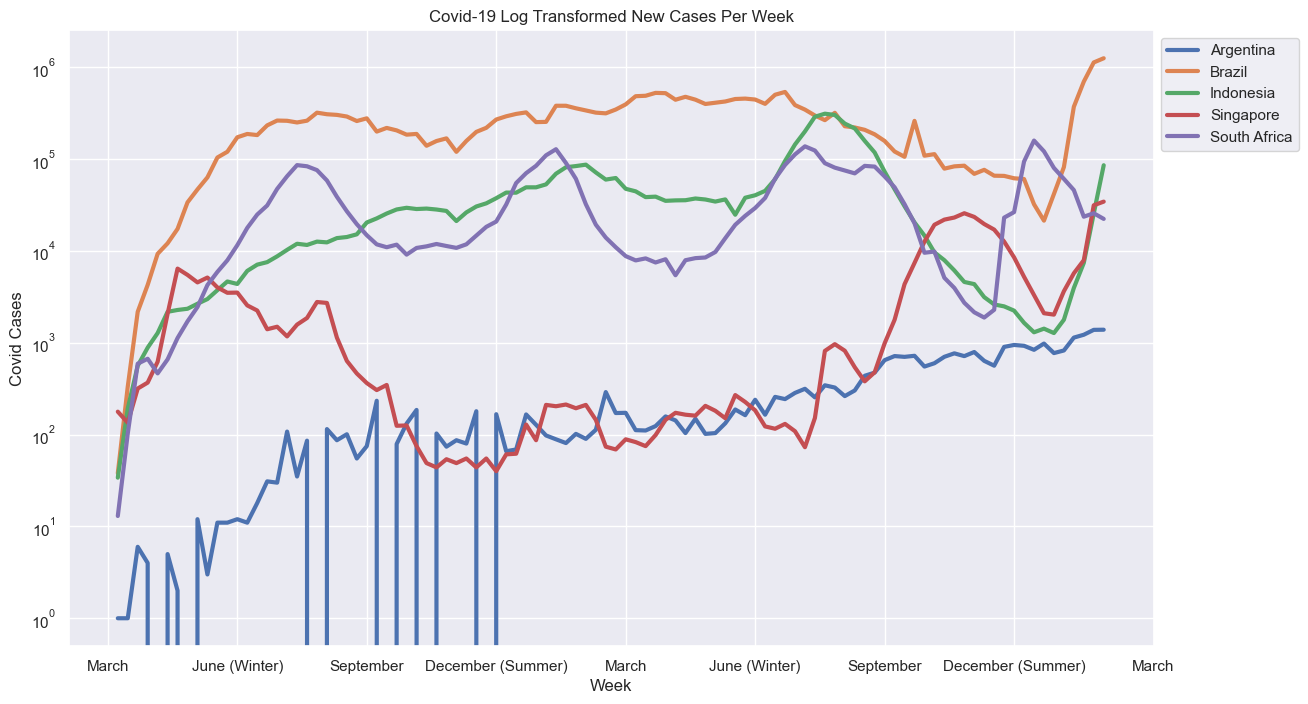

In [26]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=df, x ='week', y = 'argentina',
                label='Argentina', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'brazil',
                label='Brazil', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'indonesia',
                label='Indonesia', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'singapore',
                label='Singapore', lw=3)
ax = sns.lineplot(data=df, x ='week', y = 'south_africa',
                label='South Africa', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.yscale("log") 
plt.ylabel('Covid Cases')
plt.xlabel('Week')
plt.title('Covid-19 Log Transformed New Cases Per Week')
plt.xticks([0,13,26,39,52,65,78,91, 105], ['March', 'June (Winter)','September', 'December (Summer)','March', 'June (Winter)','September', 'December (Summer)', 'March'])
plt.savefig('cases_log2.png')
plt.show()

In [27]:
def fft_(week_cases):
    X = fft(week_cases)
    N = len(X)
    n = np.arange(N)
    # get the sampling rate
    sr = 1 / (60*60)
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    t_h = 1/f_oneside / (60 * 60)
    y = np.abs(X[:n_oneside])/n_oneside

    return t_h, y


In [28]:
t, africa = fft_(southafrica_week_cases)
t2, canada = fft_(canada_week_cases)
t3, india = fft_(india_week_cases)
t4, uk = fft_(uk_week_cases)
t5, usa = fft_(usa_week_cases)
t6, russia =fft_(russia_week_cases)
t7, argentina = fft_(argentina_week_cases)
t8, brazil = fft_(brazil_week_cases)
t9, singapore = fft_(singapore_week_cases)
t10, indonesia = fft_(indonesia_week_cases)

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_73890/1115409949.py:15: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


In [29]:
fft_df = pd.DataFrame(list(zip(t, canada, india, russia, uk, usa, argentina, brazil, indonesia, singapore, africa)),
               columns =['periodicity','canada_psd', 'india_psd', 'russia_psd', 'uk_psd', 'usa_psd','argentina_psd','brazil_psd', 'indonesia_psd', 'singapore_psd', 'south_africa_psd'])


fft_df.head(10)

,periodicity,canada_psd,india_psd,russia_psd,uk_psd,usa_psd,argentina_psd,brazil_psd,indonesia_psd,singapore_psd,south_africa_psd
0,inf,6552.500000,826403.040000,238721.280000,38309.320000,1.514488e+06,169456.960000,516414.900000,87745.720000,7243.520000,72256.180000
1,100.000000,1619.812038,253743.624296,48610.031122,14344.701055,2.522839e+05,29707.316288,114778.472609,48515.810098,5638.068667,12175.698686
2,50.000000,2796.257600,235106.887815,72086.452859,25739.145504,6.930706e+05,38823.032739,85209.029738,29642.130576,3249.558303,10565.504376
3,33.333333,1472.195687,458036.503594,10667.668697,12051.102989,2.249144e+05,93684.644541,67080.382598,37210.313256,2313.374715,9173.747042
4,25.000000,737.995462,111239.380455,33764.418276,16676.174611,4.770936e+05,52552.818433,83028.872510,38536.729327,1772.040447,40165.987955
5,20.000000,2492.151250,302621.693528,11622.655896,14087.915424,5.348251e+05,49259.324430,73425.098012,24940.470005,1946.851812,7020.634940
6,16.666667,1471.800849,258549.016503,11268.842447,14604.427427,3.817863e+05,61568.291982,59415.882248,16743.295146,2331.347782,9893.547902
7,14.285714,1433.693638,90540.005101,30452.620172,13013.278354,3.078706e+05,42786.926139,78638.451817,20970.863629,2635.333068,3533.217569
8,12.500000,1274.930584,233808.966491,27567.234769,14494.384262,3.062515e+05,50580.479185,43806.355146,16902.043832,2642.202058,19285.570675
9,11.111111,935.459594,106871.501036,24206.022226,13052.925696,3.042108e+05,45362.065994,67576.468022,9627.278010,1972.894983,2204.569312


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


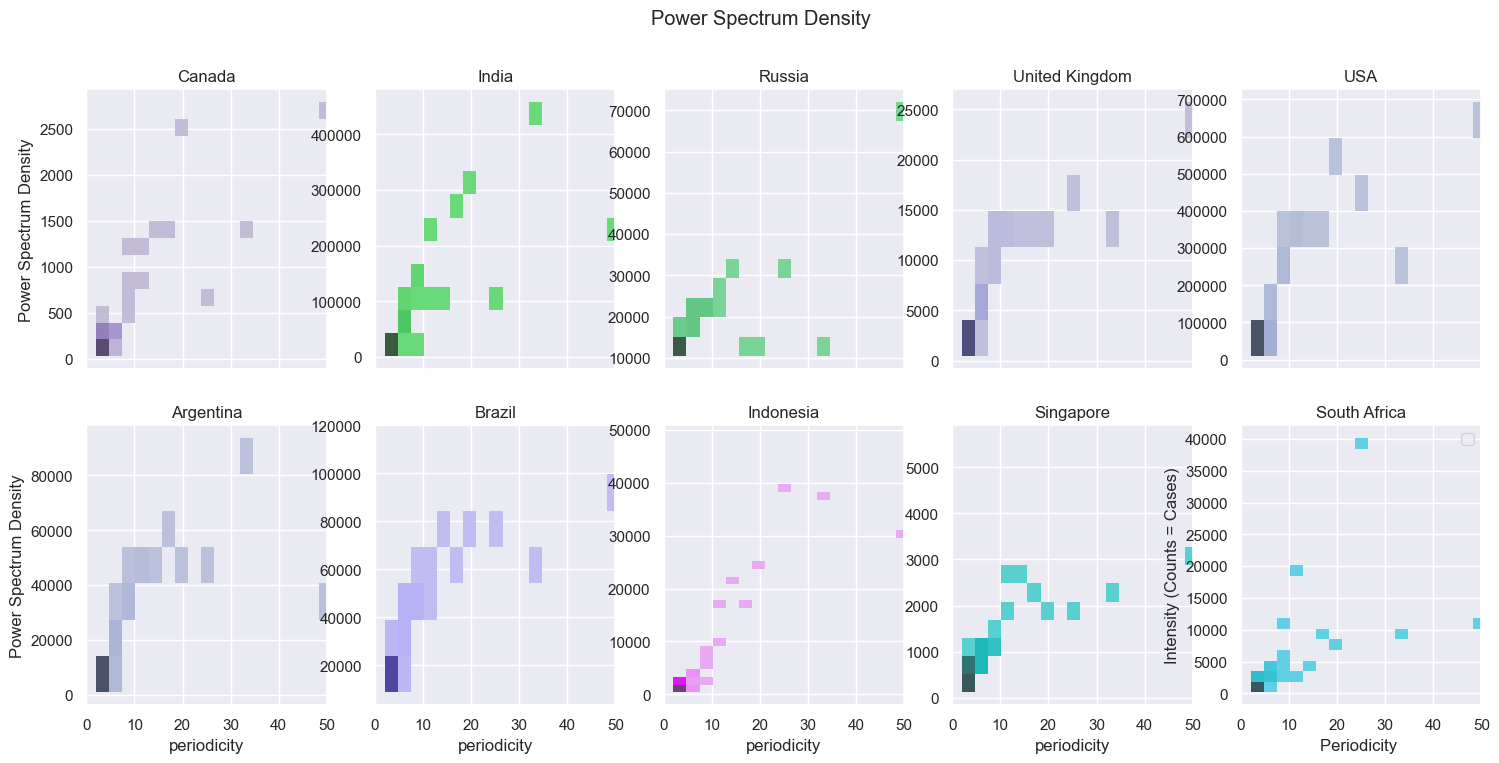

In [30]:
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(18,8))
sns.histplot(ax=axes[0,0], data=fft_df, x ='periodicity', y = 'canada_psd',
                label='Canada', kde=True, color="#443266")
axes[0,0].set_title('Canada')
axes[0,0].set_ylabel('Power Spectrum Density')
sns.histplot(ax=axes[0,1], data=fft_df, x ='periodicity', y = 'india_psd',
                label='India', kde=True, color="#44F266")
axes[0,1].set_title('India')
axes[0,1].set_ylabel('')
sns.histplot(ax=axes[0,2],data=fft_df, x ='periodicity', y = 'russia_psd',
                label='Russia', kde=True, color="#44A266")
axes[0,2].set_title('Russia')
axes[0,2].set_ylabel('')
sns.histplot(ax=axes[0,3],data=fft_df, x ='periodicity', y = 'uk_psd',
                label='UK', color='#C3C3E5')
axes[0,3].set_title('United Kingdom')
axes[0,3].set_ylabel('')
sns.histplot(ax=axes[0,4],data=fft_df, x ='periodicity', y = 'usa_psd',
                label='USA', color='#C3CCE5')
axes[0,4].set_title('USA')
axes[0,4].set_ylabel('')
sns.histplot(ax=axes[1,0],data=fft_df, x ='periodicity', y = 'argentina_psd',
                label='Argentina', color='#C3CAE5')
axes[1,0].set_title('Argentina')
axes[1,0].set_ylabel('Power Spectrum Density')
sns.histplot(ax=axes[1,1],data=fft_df, x ='periodicity', y = 'brazil_psd',
                label='Brazil', color='#F1F0FF')
axes[1,1].set_title('Brazil')
axes[1,1].set_ylabel('')
sns.histplot(ax=axes[1,2], data=fft_df, x ='periodicity', y = 'indonesia_psd',
                label='Indonesia', color='#F1A0FF')
axes[1,2].set_title('Indonesia')
axes[1,2].set_ylabel('')
sns.histplot(ax=axes[1,3], data=fft_df, x ='periodicity', y = 'singapore_psd',
                label='Singapore',  color='#F1FFFF')
axes[1,3].set_title('Singapore')
axes[1,3].set_ylabel('')
sns.histplot(ax=axes[1,4], data=fft_df, x ='periodicity', y = 'south_africa_psd',
                label='South Africa',  color='#F1FCFF')
axes[1,4].set_title('South Africa')
axes[1,4].set_ylabel('')

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.xlabel("Periodicity ")
plt.ylabel("Intensity (Counts = Cases)")
fig.suptitle("Power Spectrum Density", )
plt.xlim(0,50)
plt.legend(bbox_to_anchor=(1, 1))
#plt.yscale("log") 
plt.savefig('PSD.png')
plt.show()
